WEEKLY QUIZ WEEK10 위클리퀴즈 10주차입니다.

좌측상단에 파일->Drive에 사본저장->구글 드라이브에 있는 사본으로 문제푸신후 실행 제출부탁드립니다.

제출시 상단의 노트제목은 "week10_이름"으로 변경하시고 우측상단에 공유 눌러서 링크복사 후에 링크올리시면됩니다.

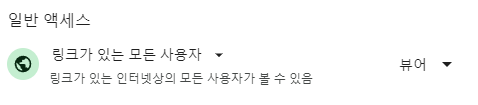

#Airpassenger (캐글 데이터)
##링크 : https://drive.google.com/drive/folders/1Vx_eLDSYg1nE-VUZV7SiMYumysDBJFpj?usp=sharing

### 데이터 불러오고 .head 와 .tail로 확인할것(시계열 주기성이 어떻게 되는지, 언제부터 언제까진지 확인하여야함)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

In [ ]:
# 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AirPassengers.csv')
#head tail print
print(data.head())
print(data.tail())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121
       Month  #Passengers
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432


### Month를 indexing 한다.(시계열 데이터는 날짜 칼럼을 indexing 하여야함)

In [ ]:
#Month  to index
data.set_index('Month', inplace=True)

### 데이터 시각화 (비정상성 데이터인지 확인)

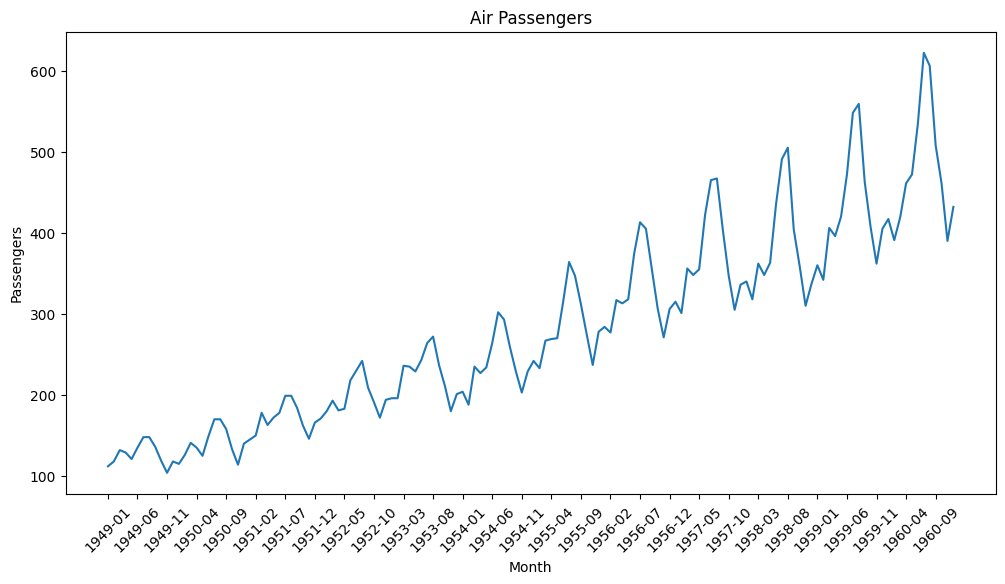

In [ ]:
# 비정상 데이터 확인 및 시각화
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data)
ax.set_xlabel('Month')
ax.set_ylabel('Passengers')
ax.set_title('Air Passengers')
ax.set_xticks(data.index[::5], labels=data.index[::5], rotation=45);

### ADF 테스트를 통해 데이터의 정상성 확인

        from statsmodels.tsa.stattools import adfuller

        result = adfuller(data['#Passengers'])
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['#Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.815369
p-value: 0.991880


### 비정상성 데이터는 정상성으로 바꿔야한다고 했습니다.
### ADF 테스트를 통해 정상성을 확인 할 수 있는데요.
### result[0]: ADF 통계량입니다.  이 값이 작을수록 데이터가 정상성을 띠는 경향입니다.
### result[1]: p-value를 출력합니다. 일반적으로 p-value가 0.05보다 작으면 데이터가 정상성을 가진다고 판단할 수 있습니다.

### 데이터 차분
        data_diff = data.diff().dropna()


### data.diff(): 데이터의 차분을 계산하는 코드입니다.. 차분은 각 시점의 값에서 이전 시점의 값을 빼는 작업입니다. 이는 시계열 데이터의 추세(trend)를 제거하고 정상성을 확보하는 데 도움을 줍니다.
### .dropna(): 차분을 계산한 후에 발생하는 NaN 값을 제거합니다. 차분을 적용하면 첫 번째 데이터 포인트가 NaN이 되기 때문에 이를 제거합니다.


In [ ]:
data_diff = data.diff().dropna()

### 차분한 데이터 정상성 확인
        result_diff = adfuller(data_diff['#Passengers'])
        print('ADF Statistic (Differenced Data): %f' % result_diff[0])
        print('p-value (Differenced Data): %f' % result_diff[1])

### 위 코드를 이용하여 차분 전 차분 후 값을 비교할 것
### (차분 외에도 비정상성 데이터를 정상성으로 바꾸는 전처리 방법은 많지만 금주에는 차분만 보여드리겠습니다.)

In [ ]:
result_diff = adfuller(data_diff['#Passengers'])
print('ADF Statistic (Differenced Data): %f' % result_diff[0])
print('p-value (Differenced Data): %f' % result_diff[1])

ADF Statistic (Differenced Data): -2.829267
p-value (Differenced Data): 0.054213


### 차분한 데이터 시각화 코드 짜기

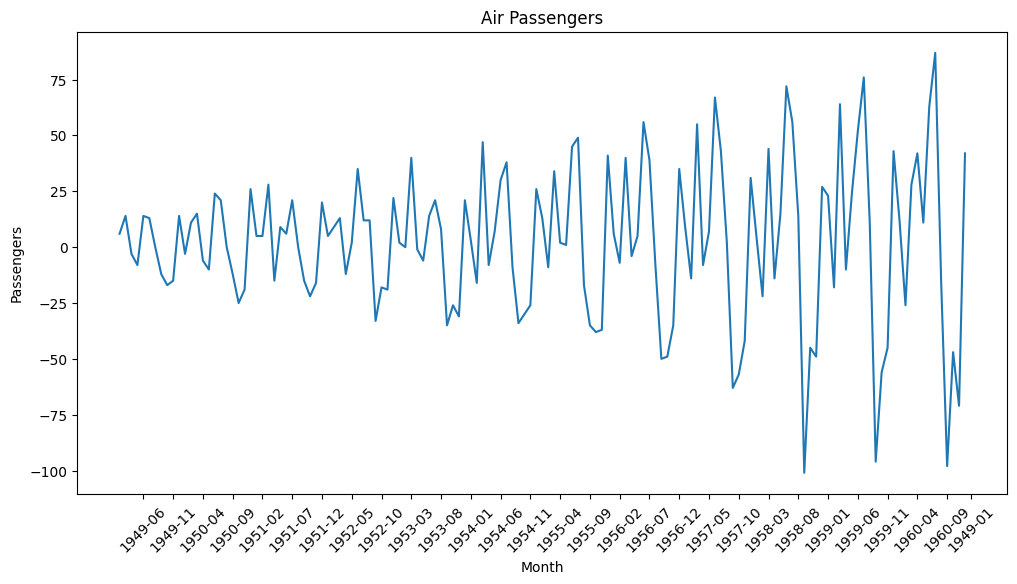

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data_diff)
ax.set_xlabel('Month')
ax.set_ylabel('Passengers')
ax.set_title('Air Passengers')
ax.set_xticks(data.index[::5], labels=data.index[::5], rotation=45);

### 데이터 전처리
        1) 차분 데이터를 가져와 minmaxscaling 하기
        2) train 8, test 2 비율로 데이터셋 나누기

In [ ]:
# min max scaling code
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_diff)
x_train, x_test = train_test_split(data_scaled, test_size=0.2, shuffle=False)

    def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

    time_step = 10
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)


In [ ]:
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X_train, y_train = create_dataset(x_train, time_step)
X_test, y_test = create_dataset(x_test, time_step)

### 위 코드는 타임 스텝에 따라 데이터를 슬라이싱하고, numpy 배열로 바꿔 데이터를 가공하는 부분입니다. (RNN이나 lstm 모델에서 시계열 데이터는 time_step에 따라 데이터를 가공해줘야함)

    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### 위 코드는 RNN에 입력하기위해 data shape 변경입니다.

### 차분한 데이터를 가져와 Arima 모델로 예측 및 시각화 할 것
    1) order=(5, 1, 0)으로 세팅
    2) 예측 forecast steps=len(test_data) 세팅

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(data_diff, order=(5, 1, 0))
arima_model_fit = arima_model.fit()
forecast = arima_model_fit.forecast(steps=len(x_test))
predicted_df = pd.DataFrame(forecast.values, columns=['#Passengers'], index=forecast.index)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


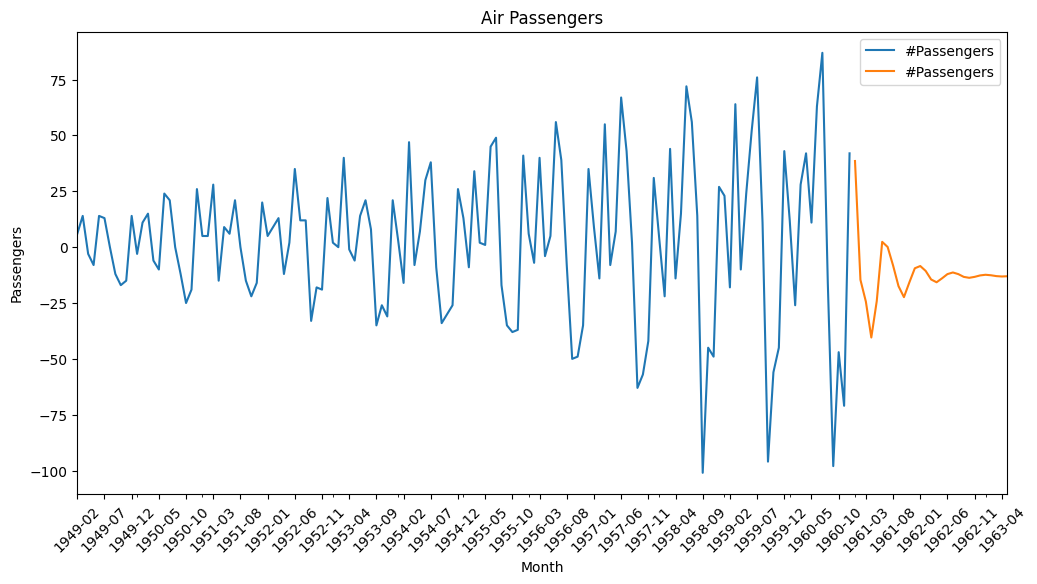

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data_diff_to_pd.index = pd.to_datetime(data_diff_to_pd.index)
predicted_df.index = pd.to_datetime(predicted_df.index)

fig, ax = plt.subplots(figsize=(12, 6))

data_diff_to_pd.plot(ax=ax, label='Difference')
predicted_df.plot(ax=ax, label='Prediction')

ax.set_xlabel('Month')
ax.set_ylabel('Passengers')
ax.set_title('Air Passengers')
all_data = pd.concat([data_diff_to_pd, predicted_df], axis=1)

ax.set_xticks(all_data.index[::5])
ax.set_xticklabels([date.strftime('%Y-%m') for date in all_data.index[::5]], rotation=45)

ax.legend()

plt.show()


### RNN 모델
### 모델 구조
        1) 순차모델 생성
        2) SimpleRNN 레이어를 추가하고 50개의 유닛을 가지고 있으며, 입력 형태는 (time_step, 1) return_sequences=True로 설정하기
        3) 두 번째 SimpleRNN 레이어를 추가. 이 레이어도 50개의 유닛을 가지고 있으며, 마지막 타임 스텝의 출력만을 반환할 것
        4) 출력 레이어(Dense)를 추가 이 레이어는 하나의 뉴런을 가지고 있음
        5) 모델을 컴파일. Optimizer = Adam,loss = mean_squared_error를 사용

In [ ]:
# sequence model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1), return_sequences=True))
model.add(SimpleRNN(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

### 모델 훈련
    1)epochs=50
    2)batch_size=64
    3)verbose=1

In [ ]:
# fit
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

Epoch 1/50
2/2 [==============================] - 3s 12ms/step - loss: 0.1950
Epoch 2/50
2/2 [==============================] - 0s 11ms/step - loss: 0.1184
Epoch 3/50
2/2 [==============================] - 0s 12ms/step - loss: 0.1238
Epoch 4/50
2/2 [==============================] - 0s 15ms/step - loss: 0.0776
Epoch 5/50
2/2 [==============================] - 0s 15ms/step - loss: 0.0439
Epoch 6/50
2/2 [==============================] - 0s 14ms/step - loss: 0.0639
Epoch 7/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0378
Epoch 8/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0337
Epoch 9/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0443
Epoch 10/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0301
Epoch 11/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0258
Epoch 12/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0320
Epoch 13/50
2/2 [==============================] - 0s 12ms/st

### 훈련시킨 모델을 가져와 train, test셋 각각 예측

In [ ]:
# pred
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

1/1 [==============================] - 0s 24ms/step


### 예측 값 되돌리기(minmax scaling 때문)
### inverse_transform 사용 할 것

In [ ]:
# minmax 리버스
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

### 예측 결과 시각화

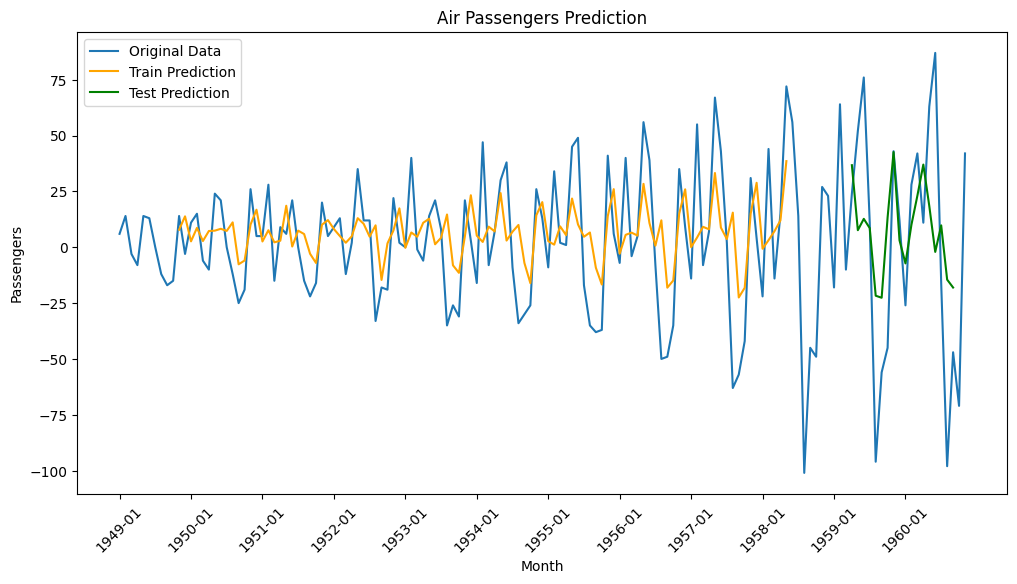

In [ ]:
# 원본 데이터와 예측 데이터의 시각화
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(scaler.inverse_transform(data_scaled), label='Original Data')

train_range = range(time_step, len(train_predict)+time_step)
ax.plot(train_range, train_predict, color='orange', label='Train Prediction')

test_range = range(len(train_predict)+2*time_step, len(train_predict)+2*time_step+len(test_predict))
ax.plot(test_range, test_predict, color='green', label='Test Prediction')

ax.set_xlabel('Month')
ax.set_ylabel('Passengers')
ax.set_title('Air Passengers Prediction')

ax.set_xticks(range(0, len(data_scaled), 12))
ax.set_xticklabels(data.index[::12], rotation=45)
ax.legend();